In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [3]:
#majors2020 = pd.read_table("data/uc.berkeley.student.majors.2020.txt")
df = pd.DataFrame()
files = glob.glob("data/*.txt")
course_data = glob.glob("data/uc.berkeley.student.course.data.*.txt")
majors = glob.glob("data/uc.berkeley.student.majors.*.txt")
pathways = glob.glob("data/uc.berkeley.stem.*.txt")


In [94]:
stem = pd.read_table(files[24])#.groupby(['year','ethnic.l1']).count().iloc[:,1]
#stem = pd.DataFrame(stem)
other = stem.groupby(['year','ethnic.l1']).count()[['count']]

In [95]:
stem.set_index('year', inplace=True)

In [111]:
temp = other.unstack()['count']

In [113]:
temp['International']

ethnic.l1,Asian/Pacific Islander,International,Underrepresented Minority,White/Other
year,,,,
2007,3006,292,1193,2947
2008,2940,527,1160,2888
2009,2887,605,1235,2984
2010,2830,778,1185,2831
2011,2922,1074,1386,2622
2012,2883,1023,1350,2374
2013,2954,1413,1353,2448
2014,3341,1219,1707,2682
2015,3072,1135,1510,2527


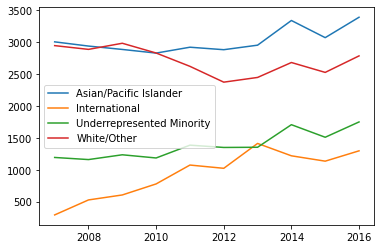

In [120]:
plt.plot(temp.index, 'Asian/Pacific Islander', data=temp, label='Asian/Pacific Islander')
plt.plot(temp.index, 'International', data=temp, label='International')
plt.plot(temp.index, 'Underrepresented Minority', data=temp, label='Underrepresented Minority')
plt.plot(temp.index, 'White/Other', data=temp, label='White/Other')
plt.plot(figsize=(15,25))
plt.legend()

count
year ethnic.l1                       
2007 Asian/Pacific Islander      3006
     International                292
     Underrepresented Minority   1193
     White/Other                 2947
2008 Asian/Pacific Islander      2940
     International                527
     Underrepresented Minority   1160
     White/Other                 2888
2009 Asian/Pacific Islander      2887
     International                605
     Underrepresented Minority   1235
     White/Other                 2984
2010 Asian/Pacific Islander      2830
     International                778
     Underrepresented Minority   1185
     White/Other                 2831
2011 Asian/Pacific Islander      2922
     International               1074
     Underrepresented Minority   1386
     White/Other                 2622
2012 Asian/Pacific Islander      2883
     International               1023
     Underrepresented Minority   1350
     White/Other                 2374
2013 Asian/Pacific Islander      2954
     International               1413
     Underrepresented Minority   1353
     White/Other                 2448
2014 Asian/Pacific Islander      3341
     International               1219
     Underrepresented Minority   1707
     White/Other                 2682
2015 Asian/Pacific Islander      3072
     International               1135
     Underrepresented Minority   1510
     White/Other                 2527
2016 Asian/Pacific Islander      3392
     International               1297
     Underrepresented Minority   1750
     White/Other                 2786

In [37]:
stem.unstack()

count                                          \
ethnic.l1 Asian/Pacific Islander International Underrepresented Minority   
year                                                                       
2007                        3006           292                      1193   
2008                        2940           527                      1160   
2009                        2887           605                      1235   
2010                        2830           778                      1185   
2011                        2922          1074                      1386   
2012                        2883          1023                      1350   
2013                        2954          1413                      1353   
2014                        3341          1219                      1707   
2015                        3072          1135                      1510   
2016                        3392          1297                      1750   

                       
ethnic.l1 White/Other  
year                   
2007             2947  
2008             2888  
2009             2984  
2010             2831  
2011             2622  
2012             2374  
2013             2448  
2014             2682  
2015             2527  
2016             2786

In [27]:
plt.plot(stem.index, 'count', data = stem)

ValueError: x and y must have same first dimension, but have shapes (1,) and (40,)

In [28]:
stem.shape

(40, 1)

In [26]:
pd.read_table(pathways[1])['entry'].unique()

array(['ADVANCED STANDING', 'SECOND BA', 'NEW FRESHMEN'], dtype=object)